In [1]:
# Class: Computer Vision
# Name: Nguyễn Tài Tấn Lộc - CH1702038

# Find the face in list face using the face_recognition library
# Reason for choosing the method of using face_recognition, because face_recognition easy to use, but hard to install
# Reference: https://www.analyticsvidhya.com/blog/2018/08/a-simple-introduction-to-facial-recognition-with-python-codes/

# Result of action:
#  - Identify faces in images 
#  - Find all the faces in a given image

# Face recognition is interesting a subject, we can expand in many different directions, 
# so I did an extension for practice "search a player in a football team"



Input image_1:


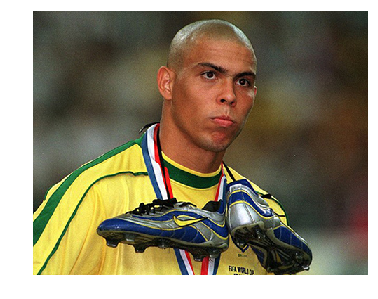

In [3]:
# import the libraries
import os
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure, axis
from pylab import rcParams
rcParams['figure.figsize'] = 6, 9

# show image by path
def show_img(path):
    axis('off') # not show ruler
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.show()

# image input
print("\nInput image_1:")
input_image1 = 'ronaldo.jpg'
show_img(input_image1)



Input list faces:


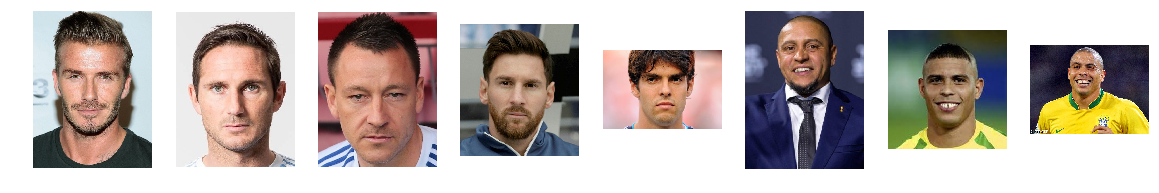

In [4]:
# make a list of all the available images
images = os.listdir('images')

# resize for to show image
rcParams['figure.figsize'] = 20, 30

# show all image in list directory
print("\nInput list faces:")
fig = figure()
for img_idx in range(len(images)):
    fig.add_subplot(1,len(images), img_idx + 1) # (row, colunm, start index)
    plt.imshow(mpimg.imread("images/" + images[img_idx]))
    axis('off')
    
rcParams['figure.figsize'] = 6, 9

In [5]:
# load face to search
image_to_be_matched = face_recognition.load_image_file(input_image1)

# encoded the loaded face into a feature vector
image_to_be_matched_encoded = face_recognition.face_encodings(
    image_to_be_matched)[0]

Not matched: David_Beckham.jpg
Not matched: Frank_Lampard.jpg
Not matched: John_Terry.jpg
Not matched: Lionel_Messi.jpg
Not matched: Ricardo_Kaka.jpg
Not matched: Roberto_Carlos.jpg

Matched: Ronaldo_1.jpg


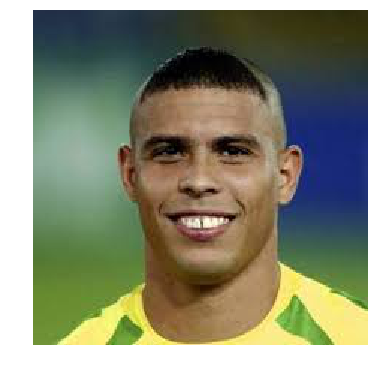


Matched: Ronaldo_2.jpg


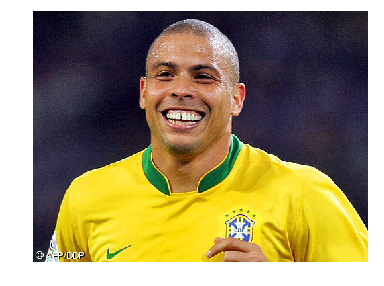

In [6]:
# iterate over each image
for image in images:
    # load the image
    current_image = face_recognition.load_image_file("images/"+image)
    
    # encode the loaded image into a feature vector
    current_image_encoded = face_recognition.face_encodings(current_image)[0]
    
    # match your image with the image and check if it matches
    result = face_recognition.compare_faces(
        [image_to_be_matched_encoded], current_image_encoded)
    
    # check if it was a match
    if result[0] == True:
        print("\nMatched: " + image)
        show_img("images/" + image)
    else:
        print("Not matched: " + image)

In [7]:

# Extension: search a player in a football team



Input image_2:


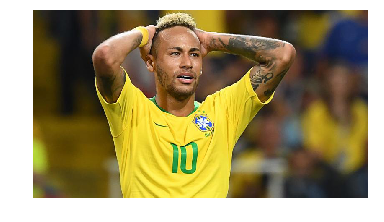


Input image_3:


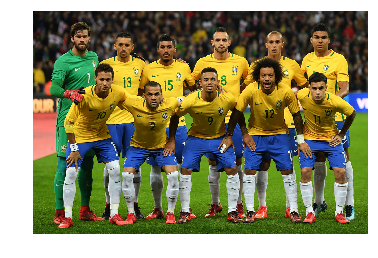

In [8]:
# input image
input_image2 = 'neymar.jpg'
input_image3 = 'brazil.jpg'

print("\nInput image_2:")
show_img(input_image2)
print("\nInput image_3:")
show_img(input_image3)

# load face to search
image_to_be_matched = face_recognition.load_image_file(input_image2)

# encoded the loaded image into a feature vector
image_to_be_matched_encoded = face_recognition.face_encodings(
    image_to_be_matched)[0]


Output - The face be found in team:


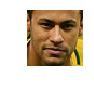

In [9]:
# this is flag exist face in image
flag_matched = False

# location index
location_index = 0

# load image brazil team
image = face_recognition.load_image_file(input_image3)

# take location of the faces player
face_locations = face_recognition.face_locations(image)

# encoded for each face location
face_encodings = face_recognition.face_encodings(image, face_locations)

# iterate over each image
for face_encoding in face_encodings:
    # match your image with the image and check if it matches
    result = face_recognition.compare_faces(
        [image_to_be_matched_encoded], face_encoding)
    
    # check if it was a match
    if result[0] == True:
        flag_matched = True
        print("\nOutput - The face be found in team:")
        
        # Take location of face matched
        top, right, bottom, left = face_locations[location_index]
        
        # Print the location of each face in this image
        face_image = image[top:bottom, left:right]
        rcParams['figure.figsize'] = 1, 2
        axis('off')
        plt.imshow(face_image)
        plt.show()
        
    location_index = location_index + 1

if flag_matched is False:
    print("Face not found !!!")